<a href="https://colab.research.google.com/github/rajiv07rawat/Task-by-The-sparks-foundation/blob/main/Task5(Buisness_problem).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Objective**:
Perform 'Exploratory Data Analysis' on the provided dataset "SampleSuperStore". Suppose,you are the buisness owner of retail firm and want to see how your company is performing.You are interested to find out the weak areas where you can work to make profit.



In [94]:
#importing libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
%matplotlib inline

In [95]:
from plotly import __version__
import cufflinks as cf

In [96]:
from plotly.offline import download_plotlyjs,init_notebook_mode,plot, iplot

init_notebook_mode(connected=True)

cf.go_offline()

In [97]:
#choose superstore csv file and wait untill 100% done for executing the later 
from google.colab import files
uploaded = files.upload()


Saving SampleSuperstore.csv to SampleSuperstore (1).csv


In [98]:
import io
df = pd.read_csv(io.BytesIO(uploaded['SampleSuperstore.csv']))

In [99]:
df

,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
0,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Bookcases,261.9600,2,0.00,41.9136
1,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Chairs,731.9400,3,0.00,219.5820
2,Second Class,Corporate,United States,Los Angeles,California,90036,West,Office Supplies,Labels,14.6200,2,0.00,6.8714
3,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Furniture,Tables,957.5775,5,0.45,-383.0310
4,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Office Supplies,Storage,22.3680,2,0.20,2.5164
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9989,Second Class,Consumer,United States,Miami,Florida,33180,South,Furniture,Furnishings,25.2480,3,0.20,4.1028
9990,Standard Class,Consumer,United States,Costa Mesa,California,92627,West,Furniture,Furnishings,91.9600,2,0.00,15.6332
9991,Standard Class,Consumer,United States,Costa Mesa,California,92627,West,Technology,Phones,258.5760,2,0.20,19.3932
9992,Standard Class,Consumer,United States,Costa Mesa,California,92627,West,Office Supplies,Paper,29.6000,4,0.00,13.3200


In [100]:
df.shape

(9994, 13)

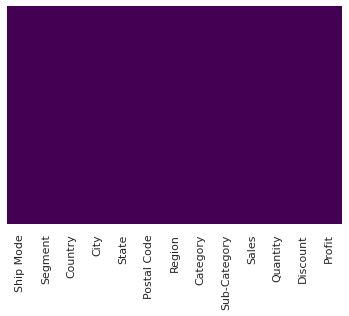

In [101]:
#Checking null values using heatmap
sns.heatmap(df.isnull(),yticklabels=False,cbar=False,cmap='viridis')


In [102]:
df.isnull().any()
#No null value

Ship Mode       False
Segment         False
Country         False
City            False
State           False
Postal Code     False
Region          False
Category        False
Sub-Category    False
Sales           False
Quantity        False
Discount        False
Profit          False
dtype: bool

In [103]:
#Checking for duplicate row in given dataset
df.duplicated().sum()

17

In [104]:
#Removal of 17 dulplicated rows
df.drop_duplicates(inplace=True)

In [105]:
df.dtypes

Ship Mode        object
Segment          object
Country          object
City             object
State            object
Postal Code       int64
Region           object
Category         object
Sub-Category     object
Sales           float64
Quantity          int64
Discount        float64
Profit          float64
dtype: object

In [106]:
df.shape
#New no. of column after removal of duplicate row

(9977, 13)

In [107]:
for i in df.columns:
    if df[i].dtype=='object':
        print("Unique Entries of ",i + " are",df[i].nunique())

Unique Entries of  Ship Mode are 4
Unique Entries of  Segment are 3
Unique Entries of  Country are 1
Unique Entries of  City are 531
Unique Entries of  State are 49
Unique Entries of  Region are 4
Unique Entries of  Category are 3
Unique Entries of  Sub-Category are 17


In [108]:
#postal code and country column doesnt effect our analsis
df=df.drop(['Country', 'Postal Code'], axis=1)

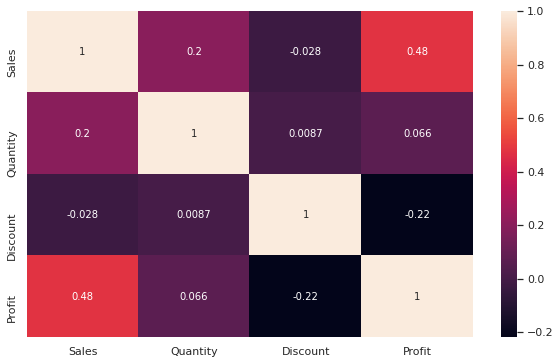

In [109]:
#Checking correlation between columns visually
corelation=df.corr()
plt.figure(figsize=(10,6))
sns.heatmap(corelation,annot=True) 
plt.show()

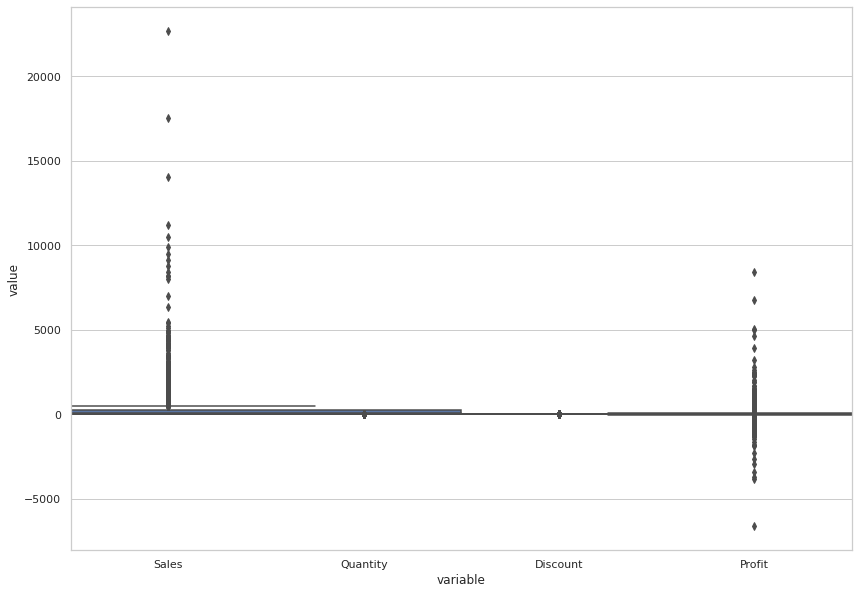

In [115]:
#BoxPlot

plt.figure(figsize=[14,10])
sns.set(style="whitegrid")
sns.boxplot(x="variable", y="value", data=pd.melt(newdf), width=3)

plt.show()

In [116]:
#Removal of Outliers
def remove_outlier(dataset,k=3.33):
    for col in dataset.columns:
            if (dataset[col].dtype=="int64" or dataset[col].dtype=="float64"):
                mean = dataset[col].mean()
                global df   
                std = dataset[col].std()    
                outlier = [i for i in dataset[col] if (i > mean - k * std)]
                outlier = [i for i in outlier if (i < mean + k * std)]       
                df = dataset.loc[dataset[col].isin(outlier)]

In [117]:
remove_outlier(df,k=3.33)

In [120]:
df.shape


(9889, 11)

In [121]:
df.head()

,Ship Mode,Segment,City,State,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
0,Second Class,Consumer,Henderson,Kentucky,South,Furniture,Bookcases,261.9600,2,0.00,41.9136
1,Second Class,Consumer,Henderson,Kentucky,South,Furniture,Chairs,731.9400,3,0.00,219.5820
2,Second Class,Corporate,Los Angeles,California,West,Office Supplies,Labels,14.6200,2,0.00,6.8714
3,Standard Class,Consumer,Fort Lauderdale,Florida,South,Furniture,Tables,957.5775,5,0.45,-383.0310
4,Standard Class,Consumer,Fort Lauderdale,Florida,South,Office Supplies,Storage,22.3680,2,0.20,2.5164


In [122]:
#Let's get the information
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9889 entries, 0 to 9993
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Ship Mode     9889 non-null   object 
 1   Segment       9889 non-null   object 
 2   City          9889 non-null   object 
 3   State         9889 non-null   object 
 4   Region        9889 non-null   object 
 5   Category      9889 non-null   object 
 6   Sub-Category  9889 non-null   object 
 7   Sales         9889 non-null   float64
 8   Quantity      9889 non-null   int64  
 9   Discount      9889 non-null   float64
 10  Profit        9889 non-null   float64
dtypes: float64(3), int64(1), object(7)
memory usage: 927.1+ KB


In [123]:
df.describe()

,Sales,Quantity,Discount,Profit
count,9889.000000,9889.000000,9889.000000,9889.000000
mean,196.570036,3.776519,0.155131,24.150294
std,383.949264,2.222506,0.204991,94.164961
min,0.444000,1.000000,0.000000,-734.526400
25%,17.088000,2.000000,0.000000,1.747200
50%,52.990000,3.000000,0.200000,8.611200
75%,203.520000,5.000000,0.200000,28.857600
max,8187.650000,14.000000,0.800000,793.716000


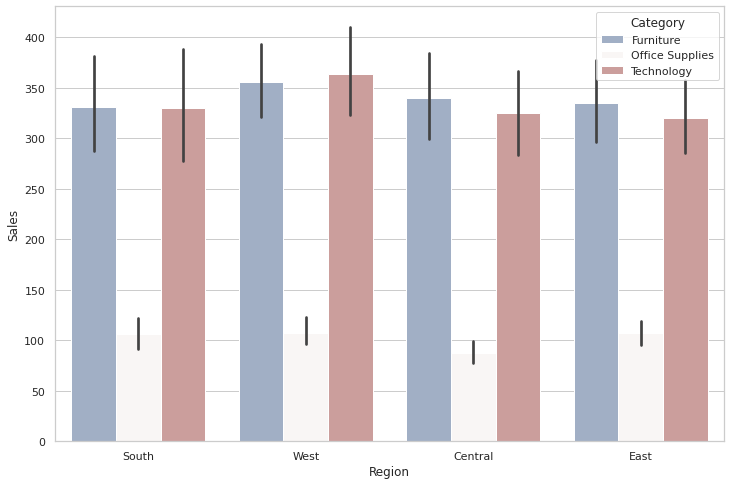

In [129]:
#Category wise sales in Each region
plt.figure(figsize=[12,8])
ax = sns.barplot(x="Region", y="Sales", hue="Category", data=df, palette="vlag")

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



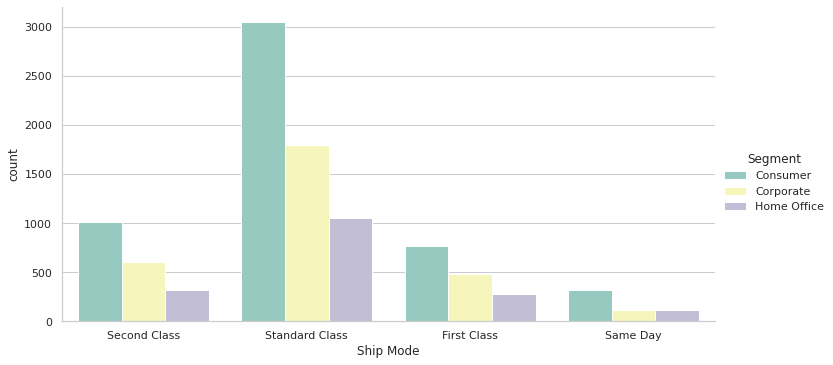

In [131]:
#Segment wise count of the ship modes
sns.catplot("Ship Mode", hue="Segment", data=df, kind="count", aspect=2, palette="Set3")

In [132]:
#Performing 1-hot encoding for the categorical features

df1=pd.get_dummies(df['Ship Mode'])
df2=pd.get_dummies(df['Segment'],drop_first=True)
df3=pd.get_dummies(df['Region'],drop_first=True)
df4=pd.get_dummies(df['Category'],drop_first=True)
df5=pd.get_dummies(df['Sub-Category'],drop_first=True)

In [133]:
data_1=pd.concat([df1,df2,df3,df4,df5,df],axis=1)
data_1.head()

,First Class,Same Day,Second Class,Standard Class,Corporate,Home Office,East,South,West,Office Supplies,Technology,Appliances,Art,Binders,Bookcases,Chairs,Copiers,Envelopes,Fasteners,Furnishings,Labels,Machines,Paper,Phones,Storage,Supplies,Tables,Ship Mode,Segment,City,State,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,Second Class,Consumer,Henderson,Kentucky,South,Furniture,Bookcases,261.9600,2,0.00,41.9136
1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,Second Class,Consumer,Henderson,Kentucky,South,Furniture,Chairs,731.9400,3,0.00,219.5820
2,0,0,1,0,1,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,Second Class,Corporate,Los Angeles,California,West,Office Supplies,Labels,14.6200,2,0.00,6.8714
3,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,Standard Class,Consumer,Fort Lauderdale,Florida,South,Furniture,Tables,957.5775,5,0.45,-383.0310
4,0,0,0,1,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,Standard Class,Consumer,Fort Lauderdale,Florida,South,Office Supplies,Storage,22.3680,2,0.20,2.5164


In [134]:
data_1.drop('Ship Mode',axis=1,inplace=True)
data_1.drop('Segment',axis=1,inplace=True)
data_1.drop('Region',axis=1,inplace=True)
data_1.drop('Category',axis=1,inplace=True)
data_1.drop('Sub-Category',axis=1,inplace=True)
data_1.dtypes

First Class          uint8
Same Day             uint8
Second Class         uint8
Standard Class       uint8
Corporate            uint8
Home Office          uint8
East                 uint8
South                uint8
West                 uint8
Office Supplies      uint8
Technology           uint8
Appliances           uint8
Art                  uint8
Binders              uint8
Bookcases            uint8
Chairs               uint8
Copiers              uint8
Envelopes            uint8
Fasteners            uint8
Furnishings          uint8
Labels               uint8
Machines             uint8
Paper                uint8
Phones               uint8
Storage              uint8
Supplies             uint8
Tables               uint8
City                object
State               object
Sales              float64
Quantity             int64
Discount           float64
Profit             float64
dtype: object

In [135]:
data_1.shape

(9889, 33)

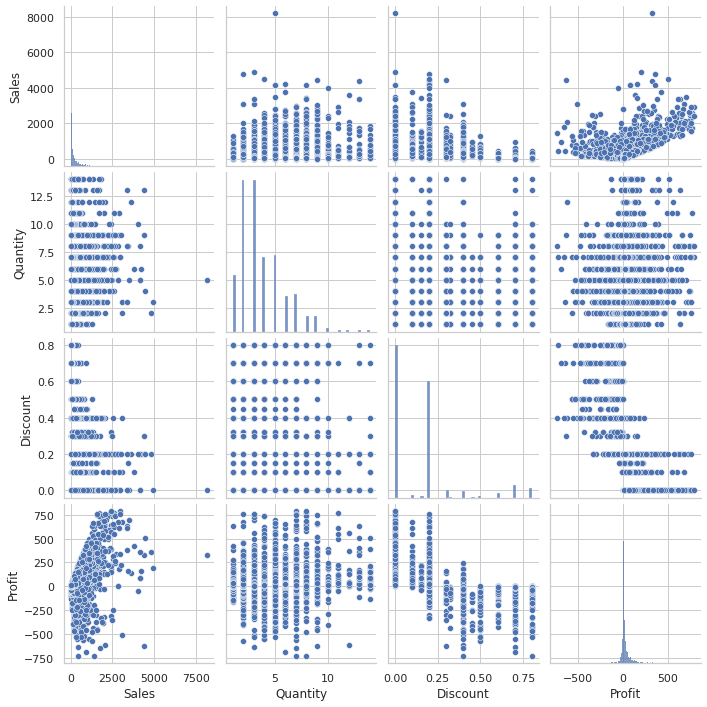

In [136]:
sns.pairplot(df)

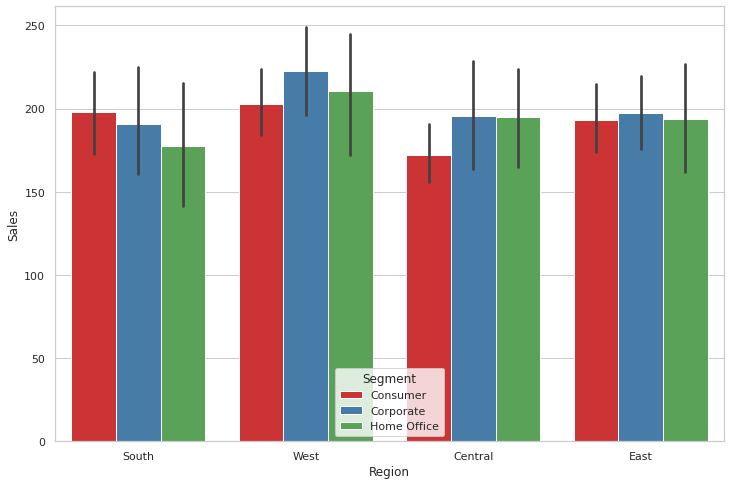

In [137]:
#Segment wise sales in Each region
plt.figure(figsize=[12,8])
ax = sns.barplot(x="Region", y="Sales", hue="Segment", data=df, palette="Set1")

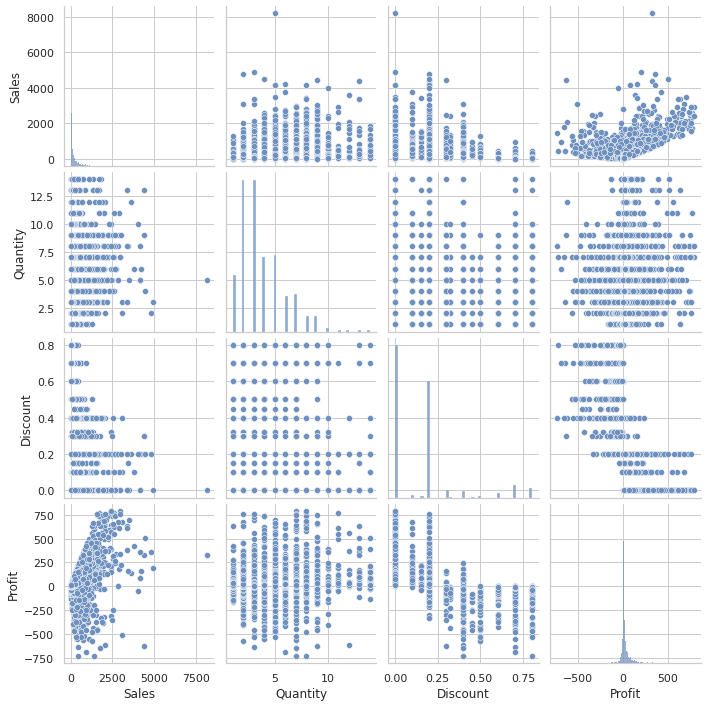

In [138]:
#Let's get some aggregated views from pairplot
sns.set_palette('vlag')
sns.pairplot(df)

In [139]:
#Let's get some insights based on Cities
grouped= df.groupby("City")

In [140]:
#aggregated Sales per city
agg_sales=grouped['Sales'].agg(np.sum).sort_values(ascending=False).reset_index()

In [141]:
#Cities with highest total sales
agg_sales.head()

,City,Sales
0,New York City,197246.023
1,Los Angeles,164434.549
2,San Francisco,109777.212
3,Seattle,96250.488
4,Philadelphia,91772.849


In [142]:

#Aggregated Profit per city
agg_profit=grouped['Profit'].agg(np.sum).sort_values(ascending=False).reset_index()

In [143]:

#Cities with Highest total Profit
agg_profit.head()

,City,Profit
0,New York City,39934.8107
1,Los Angeles,26544.4140
2,Seattle,18916.8467
3,San Francisco,16521.1321
4,Detroit,8200.3235


In [144]:
#Aggregate Discounts
agg_dist=grouped['Discount'].agg(np.sum).sort_values(ascending=False).reset_index()

In [145]:
#Cities with highest aggregated Discount
agg_dist.head()

,City,Discount
0,Philadelphia,173.50
1,Houston,139.54
2,Chicago,117.90
3,Dallas,55.50
4,Los Angeles,54.70


In [146]:
#Average Sales of city
avg_sales=grouped['Sales'].agg(np.mean).sort_values(ascending=False).reset_index()

In [147]:
#Cities with highest Average sales
avg_sales.head()

,City,Sales
0,Cheyenne,1603.136000
1,Bellingham,1263.413333
2,Independence,1208.685000
3,Burbank,1082.386000
4,Buffalo,906.349600


In [148]:
#Cities with lowest Average sales
avg_sales.tail()

,City,Sales
526,Ormond Beach,2.808
527,Pensacola,2.214
528,Jupiter,2.064
529,Elyria,1.824
530,Abilene,1.392


In [149]:
#Average Profit per city
avg_profit=grouped['Profit'].agg(np.mean).sort_values(ascending=False).reset_index()

In [150]:
#Cities with highest Average profit
avg_profit.head()

,City,Profit
0,Independence,487.831500
1,Appleton,277.383150
2,Burbank,254.844600
3,Lehi,225.831300
4,Beverly,218.306467


In [151]:

#Cities with lowest Average profit
avg_profit.tail()

,City,Profit
526,Rockford,-104.500709
527,Normal,-110.023200
528,Yuma,-116.497725
529,Oswego,-178.709200
530,Champaign,-182.352000


In [ ]:
#Cities with high Average Sales as well as Average Profit
merged2= pd.merge(high_sales,high_profit, on=['City'], how='inner')
merged2

,City,Sales,Profit
0,Cheyenne,1603.136000,100.196000
1,Bellingham,1263.413333,203.530267
2,Independence,1208.685000,487.831500
3,Burbank,1082.386000,254.844600
4,Beverly,861.063333,218.306467
5,Appleton,835.655000,277.383150
6,Torrance,783.067000,136.287750
7,Lehi,758.363000,225.831300
8,Saint Peters,697.160000,146.403600
9,Norman,675.665000,134.764350


In [ ]:

#Cities where Average Discount is less but Average Sales is High
merged3= pd.merge(low_dist,high_sales, on='City', how='inner')
merged3

,City,Discount,Sales
0,Appleton,0.0,835.655000
1,Dubuque,0.0,562.433333
2,Beverly,0.0,861.063333
3,Saint Peters,0.0,697.160000
4,Noblesville,0.0,772.795000
5,Morristown,0.0,539.853333
6,Norman,0.0,675.665000
7,Independence,0.0,1208.685000
8,Harrisonburg,0.0,626.958571
9,Madison,0.0,534.679000


In [ ]:
#Cities with high Average sales but low Average profit
merged4= pd.merge(high_sales,low_profit, on='City', how='inner')
merged4

,City,Sales,Profit
0,Richardson,644.232,-12.24465


In [ ]:
#Cities with high Average discount but low Average profit
merged5= pd.merge(high_dist,low_profit, on='City', how='inner')
merged5

,City,Discount,Profit
0,Deer Park,0.8,-10.3860
1,Abilene,0.8,-3.7584
2,Missouri City,0.8,-9.5550
3,Romeoville,0.8,-14.7708
4,Littleton,0.7,-98.8018
5,Pensacola,0.7,-1.4760
6,Elyria,0.7,-1.3984
7,Ormond Beach,0.7,-1.9656


In [ ]:
#Cities with low Average discount but High Average profit
merged6= pd.merge(low_dist, high_profit, on='City', how='inner')
merged6

,City,Discount,Profit
0,Appleton,0.0,277.383150
1,Vacaville,0.0,110.052800
2,Dubuque,0.0,159.224800
3,Washington,0.0,105.958930
4,Beverly,0.0,218.306467
5,Broken Arrow,0.0,115.104520
6,Saint Peters,0.0,146.403600
7,Muskogee,0.0,110.649150
8,Morristown,0.0,165.842750
9,Edmond,0.0,121.551950


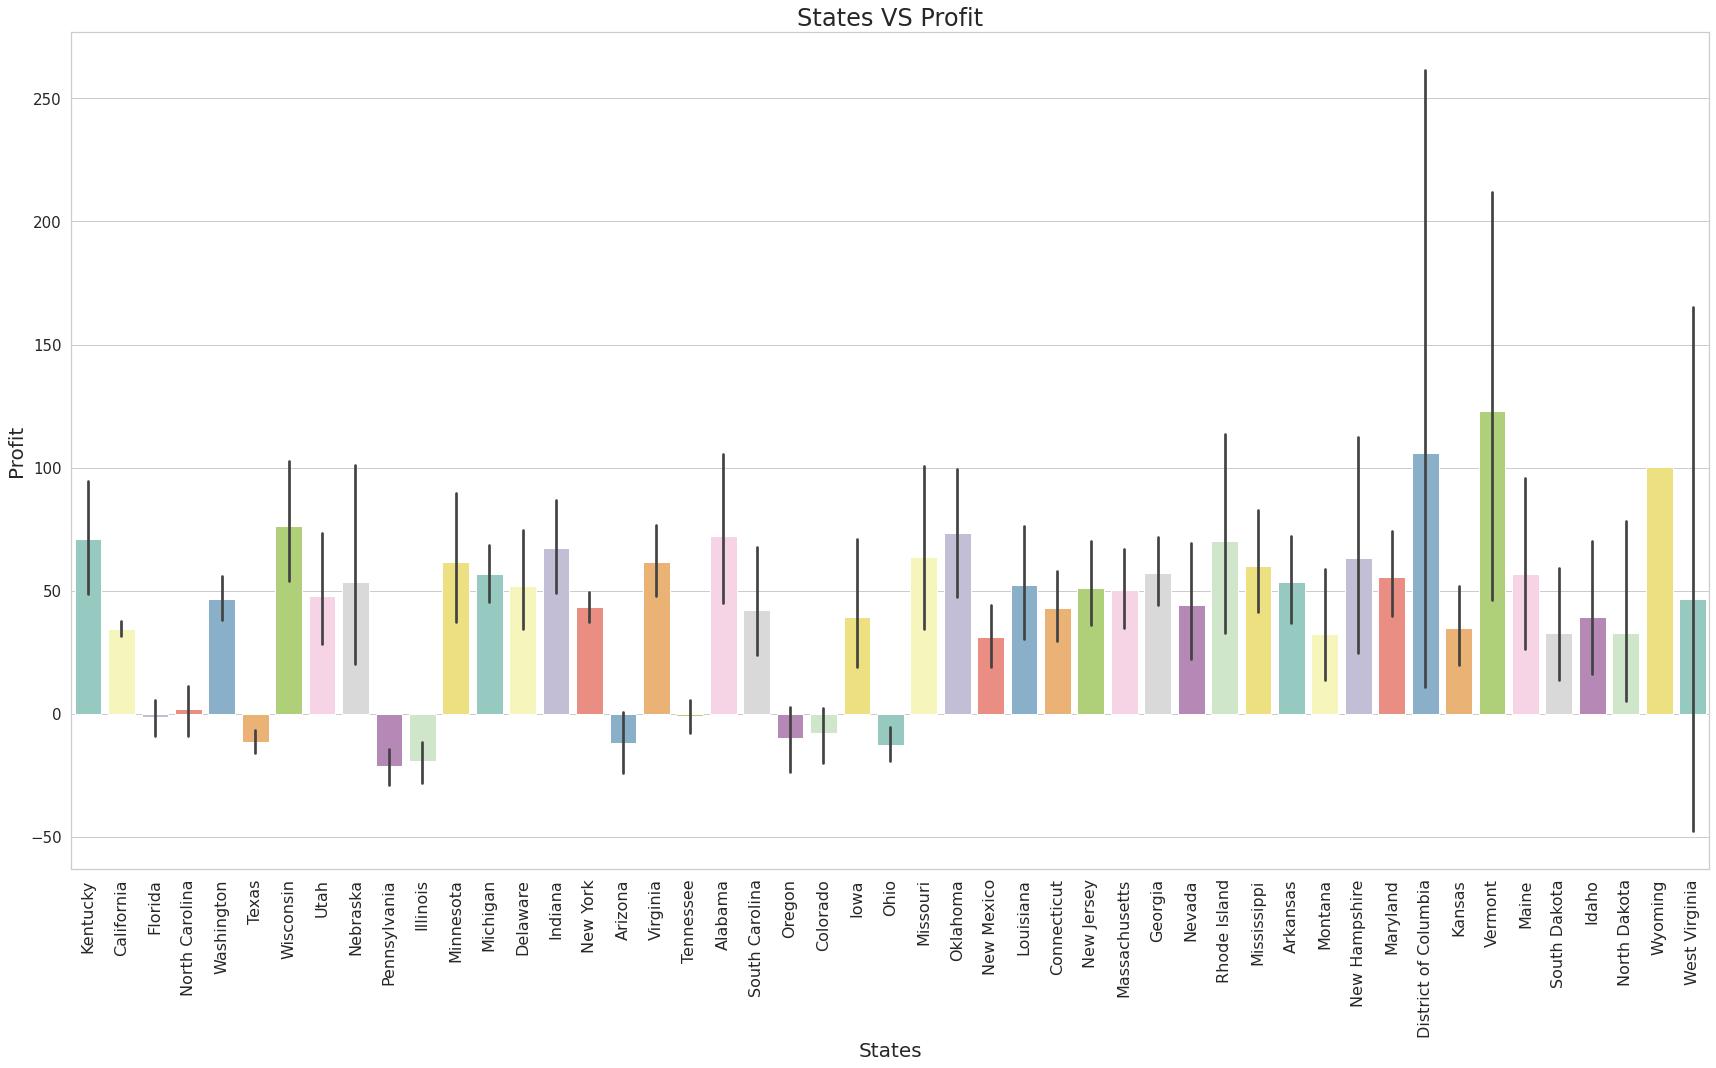

In [ ]:

#Profit of diffrent states
plt.figure(figsize=[24,15])
ax = sns.barplot(x="State", y="Profit", data=df, palette="Set3",)
plt.xticks(rotation=90, fontsize=16)
plt.yticks(fontsize=15)
plt.title("States VS Profit",fontsize=24)
plt.xlabel("States",fontsize=20)
plt.ylabel("Profit",fontsize=20)
plt.tight_layout()

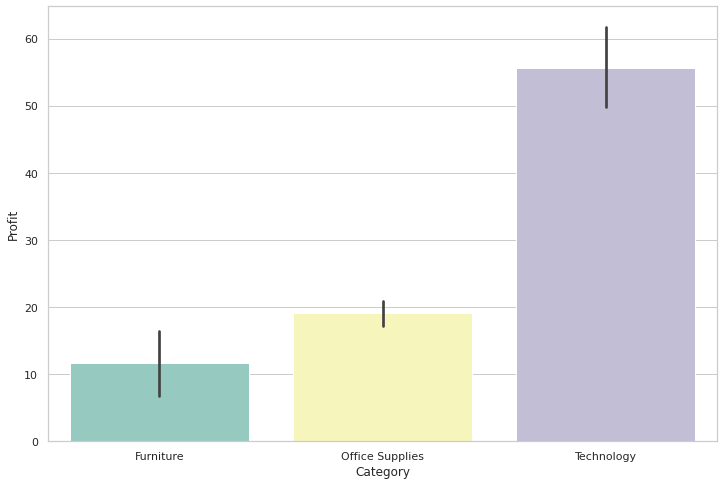

In [155]:
#Category Wise profit in the whole country
plt.figure(figsize=[12,8])
ax = sns.barplot(x="Category", y="Profit", data=df, palette="Set3")

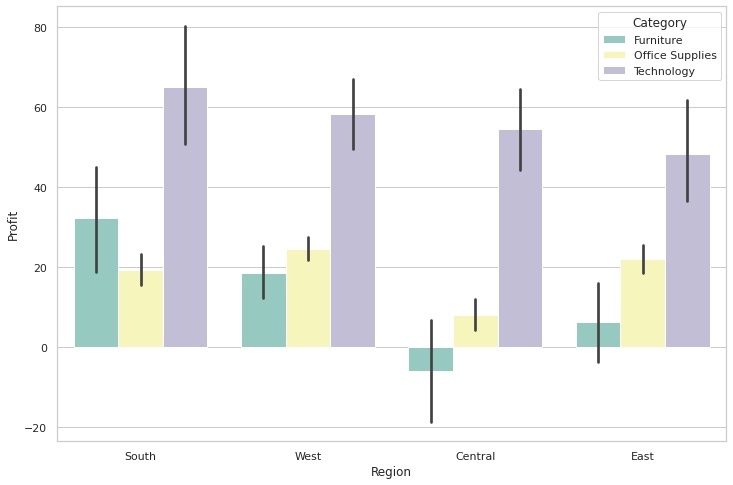

In [156]:
#Category wise Profit in Each Region
plt.figure(figsize=[12,8])
ax = sns.barplot(x="Region", y="Profit", hue="Category", data=df, palette="Set3")

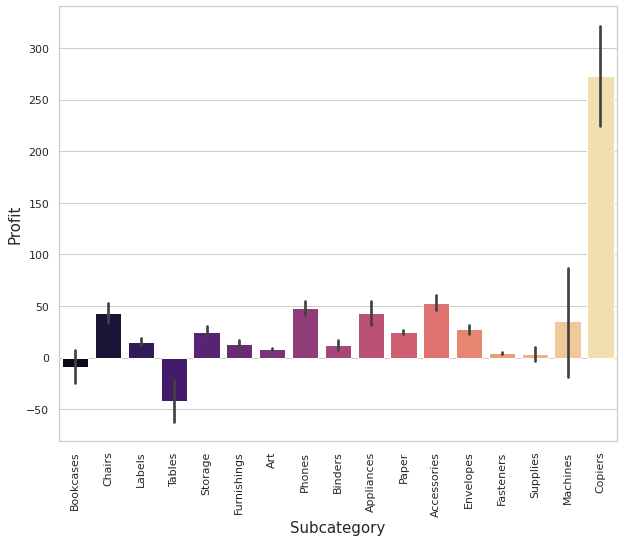

In [157]:
#Subcategory wise profit
plt.figure(figsize=[10,8])
ax = sns.barplot(x="Sub-Category", y="Profit", data=df, palette="magma")
plt.xlabel("Subcategory", fontsize=15)
plt.ylabel("Profit",fontsize=15)
plt.xticks(rotation=90)
plt.show()